In [1]:
import torch

In [2]:
A = torch.arange(-10,10,1)
A

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [3]:
import matplotlib.pyplot as plt

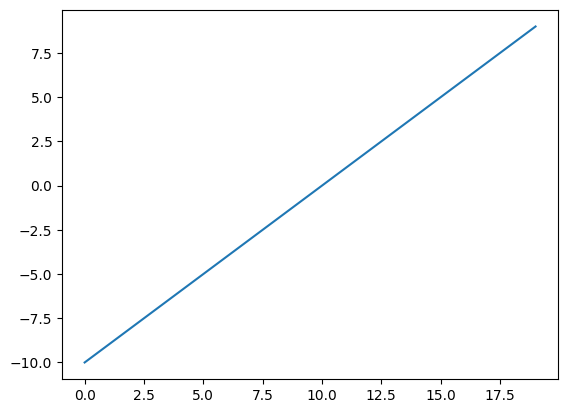

In [4]:
plt.plot(A)

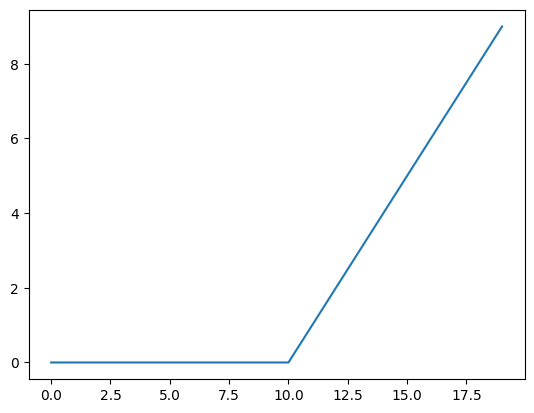

In [5]:
plt.plot(torch.relu(A))

In [6]:
def relu(x):
    return torch.maximum(torch.tensor(0), x)

In [7]:
relu(A)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
def sigmoid(x):
    return (1 / ( 1 + torch.exp(-x)))

In [9]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

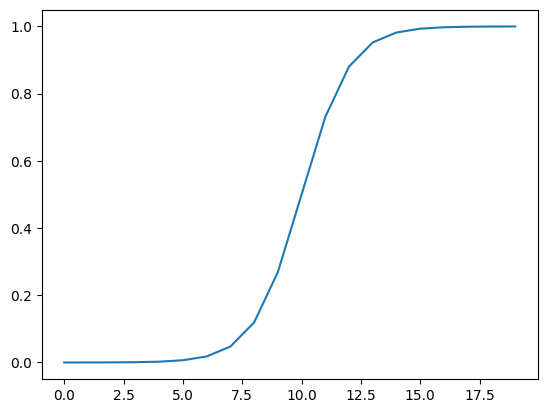

In [10]:
plt.plot(sigmoid(A))

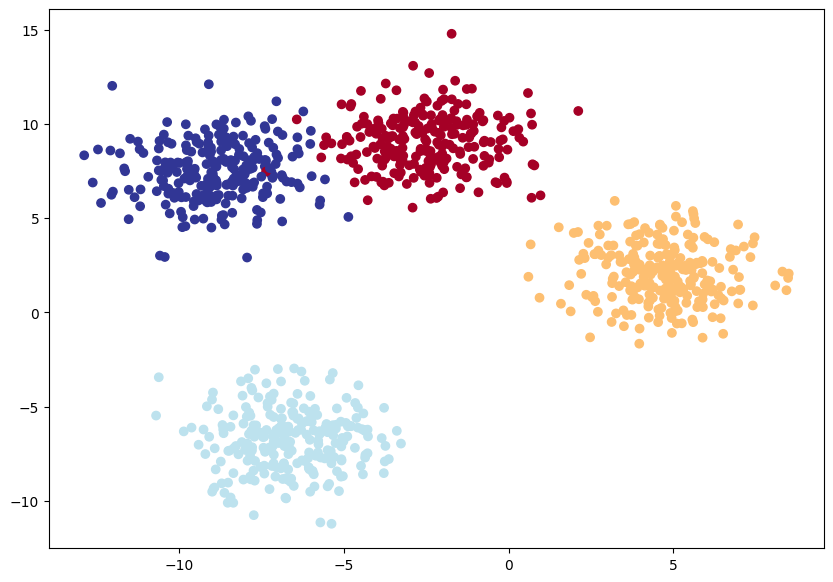

In [11]:
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split


# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


# 1. Create Multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)


# 4. Plot data (visualize)

plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap= plt.cm.RdYlBu)

In [12]:
X_blob_test

tensor([[  4.6675,   4.4878],
        [ -7.9969,   6.8803],
        [ -6.2801,  -7.8571],
        [  3.6833,   1.1767],
        [ -0.1404,  10.1654],
        [ -9.7570,   7.8658],
        [ -4.4295,  -8.5996],
        [ -2.1731,   9.0332],
        [ -9.2145,  -7.5223],
        [ -1.4015,   9.2713],
        [ -3.2043,   8.3157],
        [  5.6627,   4.7432],
        [ -0.7720,  10.2018],
        [ -2.0123,  10.4776],
        [ -1.7302,  11.3134],
        [ -6.7496,   6.9485],
        [ -8.3306,   6.8804],
        [ -5.4338,  -3.5643],
        [ -8.5540,   8.8251],
        [ -8.7147,   5.1372],
        [ -7.0068,   8.1967],
        [ -2.1881,   7.1457],
        [  0.9324,   0.7778],
        [ -4.2757,  -6.5832],
        [ -4.6285,  -5.6048],
        [ -8.0851,  -4.4214],
        [-10.0527,   7.9596],
        [ -0.3325,  10.4532],
        [  4.0984,   3.7122],
        [ -3.3258,   9.1807],
        [ -7.3375,   6.3176],
        [  4.5657,   2.9854],
        [  4.0945,   1.8878],
        [-

# 8.2 Building a multi-class classification model in PyTorch

In [13]:
# Craete device aganstic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
# Build a multi-class classification model
from torch import nn 
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        """Intializes multi-class classification model.
        Args:
            Input Features (int): Number of input feature to the model
            Output feature (int): Numb er of of output features (nuymber of output classes)
            hidden_units (int): Number of hidden units between layers, defaults 8 
            
            Return:
            
            Examples:
            """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features))
    def forward(self, x):
        return self.linear_layer_stack(x)
        
        

In [15]:
X_blob_train.shape, y_blob_train.shape, X_blob_train.shape[1]

(torch.Size([800, 2]), torch.Size([800]), 2)

In [16]:
len(y_blob_train.unique())

4

In [17]:
# create an instance of BlobModel and send it to the target device
model_1 = BlobModel(input_features=X_blob_train.shape[1], output_features=len(y_blob_train.unique())).to(device)
model_1


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [18]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [19]:
# Create a loss function of crossentropy
loss_fn = nn.CrossEntropyLoss()
# create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), 
                            lr = 0.1) # learning rate is a hyperparameter you can change

## 8.4  getting prediction probablilites for a multi-class pytorch model
In order to evaluate  and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits -> Pred probs -> Pred labels

In [20]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_blob_test)

y_logits[:10]

tensor([[-2.0945,  0.0053,  0.2121, -0.9063],
        [-0.3307, -1.2589, -1.3534,  1.0505],
        [ 4.1787,  0.2522,  1.3246,  2.0146],
        [-0.8053,  0.2321,  0.6887, -0.4560],
        [-2.9962, -0.9180, -1.1982, -0.5703],
        [-0.3007, -1.4953, -1.6827,  1.2667],
        [ 4.0504,  0.4734,  1.6206,  1.7621],
        [-2.2135, -0.9799, -1.1900, -0.1269],
        [ 4.6597, -0.0204,  0.9995,  2.4867],
        [-2.4475, -0.9386, -1.1603, -0.2788]], device='cuda:0')

In [21]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [22]:
# convert our model's logit output to prediction probablities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-2.0945,  0.0053,  0.2121, -0.9063],
        [-0.3307, -1.2589, -1.3534,  1.0505],
        [ 4.1787,  0.2522,  1.3246,  2.0146],
        [-0.8053,  0.2321,  0.6887, -0.4560],
        [-2.9962, -0.9180, -1.1982, -0.5703]], device='cuda:0')
tensor([[0.0445, 0.3631, 0.4465, 0.1459],
        [0.1744, 0.0689, 0.0627, 0.6940],
        [0.8388, 0.0165, 0.0483, 0.0963],
        [0.1031, 0.2911, 0.4595, 0.1463],
        [0.0380, 0.3033, 0.2292, 0.4295]], device='cuda:0')


In [23]:
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred[:5]


tensor([2, 3, 0, 2, 3], device='cuda:0')

In [24]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [25]:
y_pred_probs.argmax(dim=1)
# [ torch.sum(i).tolist() for i in y_pred_probs]

tensor([2, 3, 0, 2, 3, 3, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0,
        0, 0, 3, 3, 2, 3, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 3, 3, 3, 0, 3, 3, 2, 2,
        3, 3, 2, 3, 2, 2, 3, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 2, 3, 3, 3,
        2, 3, 3, 0, 3, 3, 3, 3, 0, 3, 2, 3, 3, 0, 2, 2, 3, 0, 0, 3, 3, 3, 2, 0,
        0, 3, 3, 2, 0, 3, 3, 3, 0, 3, 2, 0, 3, 0, 3, 3, 3, 3, 2, 2, 2, 3, 0, 0,
        0, 0, 3, 3, 3, 0, 0, 2, 3, 0, 3, 3, 3, 3, 0, 2, 0, 3, 3, 0, 3, 3, 0, 3,
        0, 0, 0, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 0, 0, 2, 0, 0, 3, 2, 0, 0, 3, 3,
        2, 3, 0, 3, 3, 2, 0, 2], device='cuda:0')

## 8.5 Creating a training loop and testing loop for a multi-class classification model

In [26]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()

    acc = (correct/len(y_pred)) * 100
    return acc

In [27]:
y_blob_train.dtype

torch.int64

In [28]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)
# Set the number of epochs
epochs = 100

for epoch in range(epochs):
    ### Training
    model_1.train()
    
    y_logits = model_1(X_blob_train)
    y_pred_prob = torch.softmax(y_logits, dim=1) #.argmax(dim=1)
    y_pred = torch.argmax(y_pred_prob, dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    # print out what's happening
    if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f} | Test Accuarcy: {test_acc:.2f}%")
    
   
    

Epoch: 0 | Loss: 1.80586 | Accuracy: 24.12% | Test loss: 0.75431 | Test Accuarcy: 96.50%
Epoch: 10 | Loss: 0.17286 | Accuracy: 98.50% | Test loss: 0.15843 | Test Accuarcy: 99.00%
Epoch: 20 | Loss: 0.08933 | Accuracy: 99.12% | Test loss: 0.08141 | Test Accuarcy: 99.50%
Epoch: 30 | Loss: 0.06397 | Accuracy: 99.00% | Test loss: 0.05667 | Test Accuarcy: 99.50%
Epoch: 40 | Loss: 0.05218 | Accuracy: 99.00% | Test loss: 0.04471 | Test Accuarcy: 99.50%
Epoch: 50 | Loss: 0.04550 | Accuracy: 99.00% | Test loss: 0.03778 | Test Accuarcy: 99.50%
Epoch: 60 | Loss: 0.04125 | Accuracy: 99.00% | Test loss: 0.03328 | Test Accuarcy: 99.50%
Epoch: 70 | Loss: 0.03834 | Accuracy: 99.00% | Test loss: 0.03014 | Test Accuarcy: 99.50%
Epoch: 80 | Loss: 0.03623 | Accuracy: 99.00% | Test loss: 0.02783 | Test Accuarcy: 99.50%
Epoch: 90 | Loss: 0.03464 | Accuracy: 99.00% | Test loss: 0.02606 | Test Accuarcy: 99.50%


### 8.6 Making and evaluting predictions with a PyTorch multi-class model

In [29]:
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_blob_test)
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [30]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [31]:
## 4. Make predictions and evaluate the model

# Model isn't learning anything
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

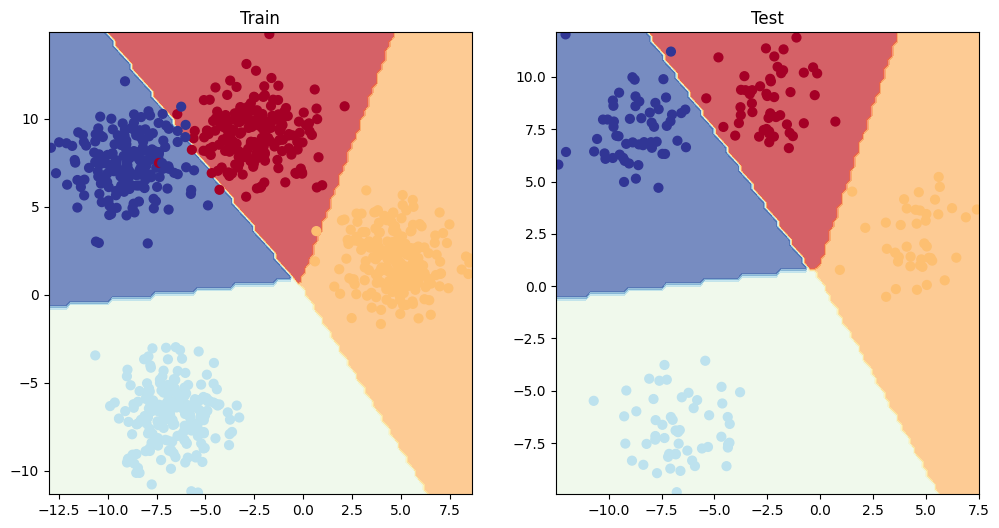

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train) 

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test) 


## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision 
* Recall
* F1-score
* Confusion matrix
* Classification report

In [33]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()

    acc = (correct/len(y_pred)) * 100
    return acc

In [34]:
(torch.eq(y_blob_test, y_pred).sum()/len(y_pred) *100).item()

99.5

In [35]:
#!pip install torchmetrics

In [36]:
import torchmetrics
from torchmetrics import Accuracy

In [37]:
# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_pred, y_blob_test)



tensor(0.9950, device='cuda:0')

In [38]:
# Setup metric
torchmetric_precision = torchmetrics.Precision(task="multiclass", num_classes=4).to(device)

# Calculate precision
torchmetric_precision(y_pred, y_blob_test)

tensor(0.9950, device='cuda:0')

In [39]:
# Setup metric
torchmetric_recall = torchmetrics.Recall(task="multiclass", num_classes=4).to(device)

# Calculate precision
torchmetric_recall(y_pred, y_blob_test)

tensor(0.9950, device='cuda:0')

In [40]:
# Setup metric
torchmetric_f1score = torchmetrics.F1Score(task="multiclass", num_classes=4).to(device)

# Calculate precision
torchmetric_f1score(y_pred, y_blob_test)

tensor(0.9950, device='cuda:0')

In [41]:
# Setup metric
torchmetric_confusion = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=4).to(device)

# Calculate precision
torchmetric_confusion(y_pred, y_blob_test)

tensor([[49,  0,  0,  0],
        [ 0, 41,  0,  0],
        [ 0,  0, 53,  0],
        [ 1,  0,  0, 56]], device='cuda:0')

In [42]:
auroc = torchmetrics.AUROC(task="multiclass", num_classes=4)
auroc(test_logits, y_blob_test)

tensor(1., device='cuda:0')

In [43]:
# # Setup metric
# torchmetric_confusion = torchmetrics.ClassificationReport(task="multiclass", num_classes=4).to(device)

# # Calculate precision
# torchmetric_confusion(y_pred, y_blob_test)

In [44]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(y_pred.cpu(), y_blob_test.cpu(), target_names=['class_0', 'class_1', 'class_2', 'class_3'])  # Modify target_names as needed
print(report)

              precision    recall  f1-score   support

     class_0       1.00      0.98      0.99        50
     class_1       1.00      1.00      1.00        41
     class_2       1.00      1.00      1.00        53
     class_3       0.98      1.00      0.99        56

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200



In [45]:
#!pip install ignite

In [46]:
torch.tensor([9], device=device)

tensor([9], device='cuda:0')